In [4]:
import pickle

bundle_path = "nbc_bundle.pkl"

with open(bundle_path, "rb") as f:
    nbc_bundle = pickle.load(f)

print("Bundle keys:", nbc_bundle.keys())

Bundle keys: dict_keys(['model_name', 'y_test', 'y_pred', 'y_proba', 'confusion_matrix', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'log_loss', 'roc_auc_ovr', 'params', 'best_score_f1_macro', 'cv_results', 'feature_names', 'X_test_sample', 'best_nb_model', 'classes'])


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Plot 1: Confusion Matrix

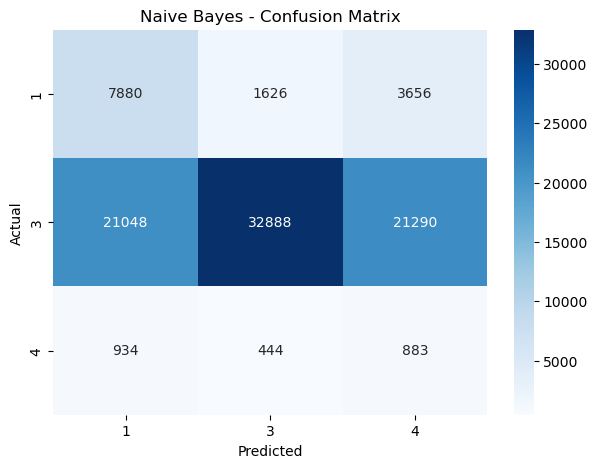

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = nbc_bundle["confusion_matrix"]
classes = nbc_bundle["classes"]

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)

plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Plot 2: ROC Curve (One-vs-Rest)

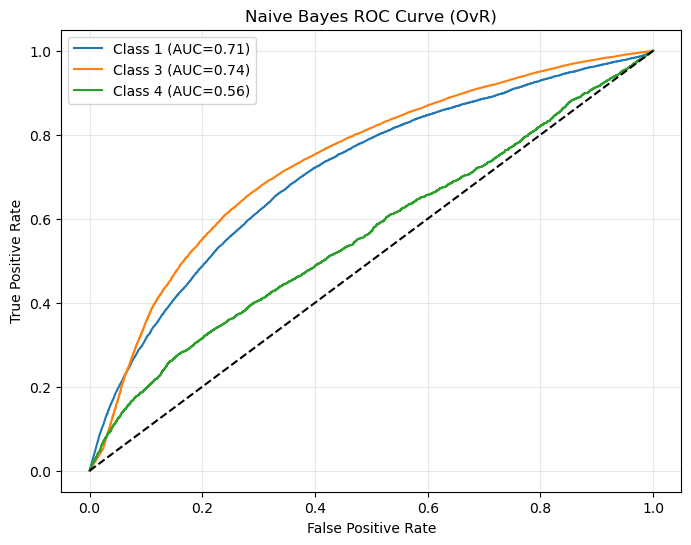

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test = nbc_bundle["y_test"]
y_proba = nbc_bundle["y_proba"]
classes = nbc_bundle["classes"]

y_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("Naive Bayes ROC Curve (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Plot 3: Interactive Probability Distribution Explorer (Plotly)

In [7]:
import plotly.express as px
import pandas as pd

y_test = nbc_bundle["y_test"]
y_proba = nbc_bundle["y_proba"]
classes = nbc_bundle["classes"]

df = pd.DataFrame(y_proba, columns=[f"proba_{c}" for c in classes])
df["actual"] = y_test
df["predicted"] = nbc_bundle["y_pred"]

fig = px.scatter(
    df,
    x=f"proba_{classes[0]}",
    y=f"proba_{classes[1]}",
    color="actual",
    hover_data=["predicted"],
    title="Interactive NB Probability Space (Hover to Inspect Misclassifications)"
)

fig.show()
